# Práctica 1: Clasificación multi-etiqueta

## Ejercicio 9

Responde a las siguientes preguntas:
1. ¿Qué método(s) parece(n) comportarse mejor globalmente? Entre otros aspectos, analiza el efecto que tiene en el rendimiento de los métodos de transformación la elección que hagamos del clasificador base.
2. ¿Cuál es el tiempo de ejecución de cada método? ¿Existen diferencias destacables?
3. ¿Observas diferencias reseñables en cuanto a los valores de cada métrica?
4. Analiza si observas alguna relación entre los resultados obtenidos para las métricas de evaluación y las características propias del conjunto ML: número de instancias, número de etiquetas, densidad, cardinalidad...? Etc Escribe un breve informe sobre si los estadísticos calculados en el entregable1 dan información del rendimiento que estás observando. ¿Se pueden extraer conclusiones al respecto? Puedes buscar información en referencia s bibliográfica s previas.
5. Realiza un script para visualizar gráficamente (mediante matplotlib) el     comportamiento de los métodos.

#### 1. ¿Qué método(s) parece(n) comportarse mejor globalmente? Entre otros aspectos, analiza el efecto que tiene en el rendimiento de los métodos de transformación la elección que hagamos del clasificador base.

Los resultados muestran que, en términos generales, el algoritmo Label Powerset tiende a comportarse mejor, ya que tiene mayores valores de accuracy, precisión, recall y F1 Score en la mayoría de los conjuntos de datos.

La elección del método base puede influír tanto en el rendimiento como en la eficiencia computacional. Esto no ha sido un experimento que se haya llevado a cabo ya que, para realizar una comparación más justa se han realizado todos los modelos con el mismo algoritmo como base. A continuación se realizará el cálculo sobre los conjuntos de datos que menos tiempo se han llevado:
- Birds
- Emotions

En el notebook se utilizó como base el algoritmo RandomForest ya que en otras prácticas en las que se han usado diferentes algoritmos, este ha sido el que mejores resultados obtuvo a nivel general. Para cambiar el algoritmo base se ha optado por uno de los implementados en la librería scikit-multilearn: GradientBoostingClassifier

*Con términos generales y a nivel general se quiere decir que para analizar los resultados se debe saber qué métrica se quiere destacar, cuál es el objetivo de la clasificación, la naturaleza del conjunto de datos, su composición en cuanto a estadísiticos... . Esto requiere un conocimiento mucho más profundo del problema y si bien se han estudiado los estadísiticos de los conjuntos de datos durante la práctica, hay otros factores con los que no se están teniendo en cuenta para la realización de estas prácticas, por lo que no se busca destacar ninguna métrica ni resultado en concreto. Sin embargo, por facilitar y simplificar el análisis, este sobre todo se centrará en el accuracy, que es una de las principales métricas utilizadas para medir el rendimiento de modelos*

In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.dataset import load_dataset
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import time

In [2]:
def evaluate_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    hamming_loss = metrics.hamming_loss(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_true, y_pred, average='weighted')
    return accuracy, hamming_loss, precision, recall, f1_score

def cl_cv(dataset):
    print(f"Dataset: {dataset}\n========================")
    # Cargar los datos de entrenamiento y prueba
    X, y, _, _ = load_dataset(dataset, 'undivided')

    # Establece base_clasifier pero que no sea RandomForestClassifier
    base_classifier = GradientBoostingClassifier()
    
    print(f"\nBinary Relevance - Dataset: {dataset}")
    start_time = time.time()
    # Binary Relevance
    br_classifier = BinaryRelevance(base_classifier)
    br_predictions = cross_val_predict(br_classifier, X, y, cv=5)
    br_metrics = evaluate_metrics(y, br_predictions)
    print(f"Accuracy: {br_metrics[0]}")
    print(f"Hamming Loss: {br_metrics[1]}")
    print(f"Precision: {br_metrics[2]}")
    print(f"Recall: {br_metrics[3]}")
    print(f"F1 Score: {br_metrics[4]}")
    end_time = time.time()
    print(f"Tiempo de ejecucion: {end_time - start_time}")

    # Label Powerset
    print(f"\nLabel Powerset - Dataset: {dataset}")
    start_time = time.time()
    lp_classifier = LabelPowerset(base_classifier)
    lp_predictions = cross_val_predict(lp_classifier, X, y, cv=5)
    lp_metrics = evaluate_metrics(y, lp_predictions)
    print(f"Accuracy: {lp_metrics[0]}")
    print(f"Hamming Loss: {lp_metrics[1]}")
    print(f"Precision: {lp_metrics[2]}")
    print(f"Recall: {lp_metrics[3]}")
    print(f"F1 Score: {lp_metrics[4]}")
    end_time = time.time()
    print(f"Tiempo de ejecucion: {end_time - start_time}")

    # MLkNN
    print(f"\nMLkNN - Dataset: {dataset}")
    start_time = time.time()
    mlknn_classifier = MLkNN(k=3)
    mlknn_predictions = cross_val_predict(mlknn_classifier, X, y, cv=5)
    mlknn_metrics = evaluate_metrics(y, mlknn_predictions)
    print(f"Accuracy: {mlknn_metrics[0]}")
    print(f"Hamming Loss: {mlknn_metrics[1]}")
    print(f"Precision: {mlknn_metrics[2]}")
    print(f"Recall: {mlknn_metrics[3]}")
    print(f"F1 Score: {mlknn_metrics[4]}")
    end_time = time.time()
    print(f"Tiempo de ejecucion: {end_time - start_time}")

In [5]:
dataset = "birds"
cl_cv(dataset)

Dataset: birds
birds:undivided - exists, not redownloading

Binary Relevance - Dataset: birds
Accuracy: 0.4883720930232558
Hamming Loss: 0.04504283965728274
Precision: 0.6068860603000057
Recall: 0.3761467889908257
F1 Score: 0.4577626479705238
Tiempo de ejecucion: 410.05008459091187

Label Powerset - Dataset: birds
Accuracy: 0.4418604651162791
Hamming Loss: 0.06544267645858833
Precision: 0.35638803777088407
Recall: 0.25229357798165136
F1 Score: 0.29335026761571253
Tiempo de ejecucion: 2533.578334569931

MLkNN - Dataset: birds


c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\skl

Accuracy: 0.4604651162790698
Hamming Loss: 0.06283149734802121
Precision: 0.22293064988019115
Recall: 0.12996941896024464
F1 Score: 0.16012818406494783
Tiempo de ejecucion: 6.625973701477051


c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
dataset = "emotions"
cl_cv(dataset)

Dataset: emotions
emotions:undivided - exists, not redownloading

Binary Relevance - Dataset: emotions
Accuracy: 0.2715008431703204
Hamming Loss: 0.20404721753794267
Precision: 0.6848361794218975
Recall: 0.6064981949458483
F1 Score: 0.6377881842606515
Tiempo de ejecucion: 52.26540803909302

Label Powerset - Dataset: emotions
Accuracy: 0.3069139966273187
Hamming Loss: 0.2203485103991006
Precision: 0.6442237272644912
Recall: 0.6588447653429603
F1 Score: 0.6495649595991957
Tiempo de ejecucion: 232.34753465652466

MLkNN - Dataset: emotions


c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\skl

Accuracy: 0.20404721753794267
Hamming Loss: 0.2844294547498595
Precision: 0.5353317022281302
Recall: 0.48194945848375453
F1 Score: 0.5053481690919257
Tiempo de ejecucion: 2.9907259941101074


Al ejecutar los algoritmos con una base diferente sobre 2 de los conjuntos de datos se observan como principales diferencias que, el tiempo de ejecución es más alto que con el otro algoritmo base. Por otro lado, a pesar de haber tomado más tiempo el rendimiento no ha mejorado. Si analizamos accuracy en la mayoría de casos obtiene resultados similares entre los dos algoritmos base pero siempre con este algoritmo base diferente se obtienen peores resultados. Por lo que sí, hay diferencias si se cambia el algoritmo base.

En el apartado anterior de la práctica se utilizó RamdonForest ya que en otros experimentos se habían obtenido buenos resultados con este algoritmo, en esta ocasión se han conseguido los resultados esperados cuando se compara con otro algoritmo. RandomForest parece tener un mejor rendimiento.

#### 2. ¿Cuál es el tiempo de ejecución de cada método? ¿Existen diferencias destacables?

| Método               | Dataset  | Tiempo de Ejecución (segundos) |
|----------------------|----------|---------------------------------|
| Binary Relevance     | scene    | 122.96                          |
| Label Powerset        | scene    | 26.66                           |
| MLkNN                | scene    | 44.30                           |
| Binary Relevance     | bibtex   | 4417.84                         |
| Label Powerset        | bibtex   | 375.25                          |
| MLkNN                | bibtex   | 144.12                          |
| Binary Relevance     | birds    | 59.37                           |
| Label Powerset        | birds    | 10.44                           |
| MLkNN                | birds    | 6.05                            |
| Binary Relevance     | emotions | 16.70                           |
| Label Powerset        | emotions | 3.20                            |
| MLkNN                | emotions | 2.80                            |
| Binary Relevance     | medical  | 108.73                          |
| Label Powerset        | medical  | 5.46                            |
| MLkNN                | medical  | 12.96                           |


Sí, hay diferencias notables en los tiempos de ejecución de cada método. En general, MLkNN tiende a tener tiempos de ejecución más bajos, aunque también Label Powerset, según el conjunto de datos un algoritmo es el que menor tiempo de ejecución tiene o el que menos. Por otro lado, Binary Relevance es el algoritmo que, con diferencia, más tiempo de ejecución lleva. Además, es interesante como según el número de instanscias de un conjunto de datos, más tiempo de ejecución lleva, es el caso de bibtex, el que más tiempo ha llevado y que era con diferencia el conjunto de datos de mayor volumen en cuanto al número de instancias.  También es importante tener en cuenta que el tiempo de ejecución puede verse afectado por el resto de programas que se estén en el ordenador.

#### 3. ¿Observas diferencias reseñables en cuanto a los valores de cada métrica?

| Métrica       | Método            | Dataset  | Valor     |
|---------------|-------------------|----------|-----------|
| Accuracy      | Binary Relevance  | scene    | 0.4574    |
| Hamming Loss  | Binary Relevance  | scene    | 0.1093    |
| Precision     | Binary Relevance  | scene    | 0.7964    |
| Recall        | Binary Relevance  | scene    | 0.4797    |
| F1 Score      | Binary Relevance  | scene    | 0.5821    |
| Accuracy      | Label Powerset     | scene    | 0.6319    |
| Hamming Loss  | Label Powerset     | scene    | 0.1154    |
| Precision     | Label Powerset     | scene    | 0.6857    |
| Recall        | Label Powerset     | scene    | 0.6460    |
| F1 Score      | Label Powerset     | scene    | 0.6649    |
| Accuracy      | MLkNN              | scene    | 0.5430    |
| Hamming Loss  | MLkNN              | scene    | 0.1157    |
| Precision     | MLkNN              | scene    | 0.6965    |
| Recall        | MLkNN              | scene    | 0.6182    |
| F1 Score      | MLkNN              | scene    | 0.6523    |

| Métrica       | Método            | Dataset  | Valor     |
|---------------|-------------------|----------|-----------|
| Accuracy      | Binary Relevance  | bibtex   | 0.1106    |
| Hamming Loss  | Binary Relevance  | bibtex   | 0.0131    |
| Precision     | Binary Relevance  | bibtex   | 0.4930    |
| Recall        | Binary Relevance  | bibtex   | 0.1566    |
| F1 Score      | Binary Relevance  | bibtex   | 0.1850    |
| Accuracy      | Label Powerset     | bibtex   | 0.2287    |
| Hamming Loss  | Label Powerset     | bibtex   | 0.0155    |
| Precision     | Label Powerset     | bibtex   | 0.4380    |
| Recall        | Label Powerset     | bibtex   | 0.3182    |
| F1 Score      | Label Powerset     | bibtex   | 0.3309    |
| Accuracy      | MLkNN              | bibtex   | 0.0749    |
| Hamming Loss  | MLkNN              | bibtex   | 0.0169    |
| Precision     | MLkNN              | bibtex   | 0.3553    |
| Recall        | MLkNN              | bibtex   | 0.2141    |
| F1 Score      | MLkNN              | bibtex   | 0.2439    |

| Métrica       | Método            | Dataset  | Valor     |
|---------------|-------------------|----------|-----------|
| Accuracy      | Binary Relevance  | birds    | 0.5209    |
| Hamming Loss  | Binary Relevance  | birds    | 0.0411    |
| Precision     | Binary Relevance  | birds    | 0.7498    |
| Recall        | Binary Relevance  | birds    | 0.2661    |
| F1 Score      | Binary Relevance  | birds    | 0.3663    |
| Accuracy      | Label Powerset     | birds    | 0.5566    |
| Hamming Loss  | Label Powerset     | birds    | 0.0378    |
| Precision     | Label Powerset     | birds    | 0.6934    |
| Recall        | Label Powerset     | birds    | 0.4771    |
| F1 Score      | Label Powerset     | birds    | 0.5557    |
| Accuracy      | MLkNN              | birds    | 0.4605    |
| Hamming Loss  | MLkNN              | birds    | 0.0628    |
| Precision     | MLkNN              | birds    | 0.2229    |
| Recall        | MLkNN              | birds    | 0.1300    |
| F1 Score      | MLkNN              | birds    | 0.1601    |

| Métrica       | Método            | Dataset  | Valor     |
|---------------|-------------------|----------|-----------|
| Accuracy      | Binary Relevance  | emotions | 0.3052    |
| Hamming Loss  | Binary Relevance  | emotions | 0.1886    |
| Precision     | Binary Relevance  | emotions | 0.7416    |
| Recall        | Binary Relevance  | emotions | 0.6011    |
| F1 Score      | Binary Relevance  | emotions | 0.6439    |
| Accuracy      | Label Powerset     | emotions | 0.3693    |
| Hamming Loss  | Label Powerset     | emotions | 0.1920    |
| Precision     | Label Powerset     | emotions | 0.6793    |
| Recall        | Label Powerset     | emotions | 0.7220    |
| F1 Score      | Label Powerset     | emotions | 0.6969    |
| Accuracy      | MLkNN              | emotions | 0.2040    |
| Hamming Loss  | MLkNN              | emotions | 0.2844    |
| Precision     | MLkNN              | emotions | 0.5353    |
| Recall        | MLkNN              | emotions | 0.4820    |
| F1 Score      | MLkNN              | emotions | 0.5053    |

| Métrica       | Método            | Dataset  | Valor     |
|---------------|-------------------|----------|-----------|
| Accuracy      | Binary Relevance  | medical  | 0.5256    |
| Hamming Loss  | Binary Relevance  | medical  | 0.0134    |
| Precision     | Binary Relevance  | medical  | 0.7782    |
| Recall        | Binary Relevance  | medical  | 0.5878    |
| F1 Score      | Binary Relevance  | medical  | 0.6489    |
| Accuracy      | Label Powerset     | medical  | 0.6789    |
| Hamming Loss  | Label Powerset     | medical  | 0.0120    |
| Precision     | Label Powerset     | medical  | 0.7602    |
| Recall        | Label Powerset     | medical  | 0.7274    |
| F1 Score      | Label Powerset     | medical  | 0.7256    |
| Accuracy      | MLkNN              | medical  | 0.4703    |
| Hamming Loss  | MLkNN              | medical  | 0.0178    |
| Precision     | MLkNN              | medical  | 0.6731    |
| Recall        | MLkNN              | medical  | 0.6240    |
| F1 Score      | MLkNN              | medical  | 0.6317    |


Se observan diferencias notables en los valores de las métricas entre los diferentes métodos y conjuntos de datos:

#### Conjunto de Datos: Scene
- **Binary Relevance:** Muestra un accuracy bajo (0.4574) con una precisión alta (0.7964) pero con un recall más bajo (0.4797), resultando en un F1 Score de 0.5821.
- **Label Powerset:** Tiene un buen equilibrio entre accuracy (0.6319), precisión y recall, con un F1 Score de 0.6649.
- **MLkNN:** Proporciona resultados intermedios en accuracy (0.5430), precisión, recall y F1 Score.

#### Conjunto de Datos: Bibtex
- **Binary Relevance:** Bajo accuracy (0.1106) con baja precisión (0.4930) y recall (0.1566), resultando en un bajo F1 Score de 0.1850.
- **Label Powerset:** Muestra mejoras en accuracy (0.2287), precisión, recall y F1 Score en comparación con Binary Relevance.
- **MLkNN:** Obtiene resultados intermedios, con una precisión más baja pero un recall y F1 Score mejorados.

#### Conjunto de Datos: Birds
- **Binary Relevance:** Accuracy moderado (0.5209) con precisión alta (0.7498) pero bajo recall (0.2661), generando un F1 Score de 0.3663.
- **Label Powerset:** Mejora en recall y F1 Score en comparación con Binary Relevance, con un accuracy de 0.5566.
- **MLkNN:** Proporciona resultados bajos en accuracy (0.4605), precisión, recall y F1 Score.

#### Conjunto de Datos: Emotions
- **Binary Relevance:** Accuracy bajo (0.3052) con precisión alta (0.7416) pero con un recall más bajo (0.6011), resultando en un F1 Score de 0.6439.
- **Label Powerset:** Mejora en recall y F1 Score en comparación con Binary Relevance, con un accuracy de 0.3693.
- **MLkNN:** Proporciona resultados bajos en todas las métricas, con un accuracy de 0.2040.

#### Conjunto de Datos: Medical
- **Binary Relevance:** Accuracy moderado (0.5256) con precisión alta (0.7782) y recall moderado (0.5878), generando un F1 Score de 0.6489.
- **Label Powerset:** Logra un equilibrio entre accuracy (0.6789), precisión y recall, con un F1 Score de 0.7256.
- **MLkNN:** Ofrece resultados intermedios en todas las métricas, con un accuracy de 0.4703.

Estas diferencias sugieren que la elección del método tiene un impacto significativo en el rendimiento del modelo en cada conjunto de datos. La interpretación de las métricas dependerá del problema específico. En este caso el análisis se ha realizado a nivel genérico sin darle más importancia a ninguna métrica,

### 4. Analiza si observas alguna relación entre los resultados obtenidos para las métricas de evaluación y las características propias del conjunto ML: número de instancias, número de etiquetas, densidad, cardinalidad, etc. Escribe un breve informe sobre si los estadísticos calculados en el entregable 1 dan información del rendimiento que estás observando. ¿Se pueden extraer conclusiones al respecto? Puedes buscar información en referencias bibliográficas previas.

Se observan algunas tendencias en los resultados en relación con las características del conjunto de datos. Por ejemplo, conjuntos de datos con mayor densidad tienden a tener mejores resultados en términos de precisión y recall. Aunque al haber tantos estadísticos a tener en cuenta todos pueden influír de diferente manera.

#### Scene
Label Powerset destaca con un accuracy del 63.19%, mostrando adaptabilidad a conjuntos más grandes. La baja densidad podría estar influyendo en la precisión y el recall.

#### Bibtex
Binary Relevance tiene un bajo rendimiento debido a la alta dimensionalidad y baja densidad. Label Powerset y MLkNN mejoran significativamente el rendimiento.

#### Birds
Label Powerset beneficia de la moderada densidad. Binary Relevance y MLkNN no muestran muy buenos resultados, sugiriendo adaptabilidad pero con margen para mejorar.

#### Emotions
Conjunto más pequeño con densidad moderada. Binary Relevance y Label Powerset tienen rendimientos similares, mientras que MLkNN muestra un rendimiento inferior.

#### Medical
Label Powerset destaca en este conjunto de datos con alta cardinalidad y densidad. Binary Relevance y MLkNN muestran resultados moderados, adaptándose a ciertas características.


Se observa que la adaptabilidad de los métodos varía según las características específicas de cada conjunto de datos. Por ejemplo, Label Powerset tiene buen rendimiento en Scene y Medical, mientras que MLkNN muestra mejor rendimiento en Birds.

La densidad del conjunto de datos tiene un impacto significativo en el rendimiento. Conjuntos con densidad alta, como Emotions y Birds, tienden tener mejores resultados en métricas como precision y recall.

La cardinalidad influye en el rendimiento de los métodos. Conjuntos con una cardinalidad alta, como Bibtex y Medical, funcionan mejor con métodos como Label Powerset, que manejan eficazmente múltiples etiquetas.

En conjuntos de datos más grandes, como Bibtex y Scene, tienden a tener mejores resultados con métodos que pueden manejar la complejidad y diversidad de etiquetas. La adaptabilidad de Label Powerset en Bibtex sugiere que este método puede gestionar la alta dimensionalidad y cantidad de etiquetas. Por otro lado, en conjuntos más pequeños como Emotions, Binary Relevance y Label Powerset tienen rendimientos similares mientras que MLkNN muestra un rendimiento inferior.

La variedad de resultados sugiere la importancia de elegir el método según las características y naturaleza de cada conjunto de datos. Cada situación es muy diferente y debe recibir una evaluación independiente y personalizada para asegurar conseguir unos resultados tan buenos como el conjunto de datos permita.


- [1]: Tsoumakas, G., & Katakis, I. (2007). Multi-label classification: An overview. International Journal of Data Warehousing and Mining (IJDWM), 3(3), 1-13.
- [2]: Read, J., Pfahringer, B., Holmes, G., & Frank, E. (2011). Classifier chains for multi-label classification. Machine learning, 85, 333-359.

#### 5. Realiza un script para visualizar gráficamente (mediante matplotlib) el comportamiento de los métodos.

Este script utiliza matplotlib para visualizar gráficamente el accuracy de cada método en cada conjunto de datos. Además en el eje derecho se ha agregado el valor del tiempo requerido por cada algoritmo. El valor temporal está expresado como una gráfica de barras de color negro con una opacidad baja mientras que el de la métrica que se muestra, en este caso accuracy, se muestran de los colores que la leyenda indica.

Se ha intentado agregar el tiempo como una gráfica de puntos, sin embargo, la librería matplotlib no permite hacerlo de manera sencilla e intuitiva por dataset según la implementación realizada. Por eso se ha optado por hacerla con una gráfica de barras complementaria.

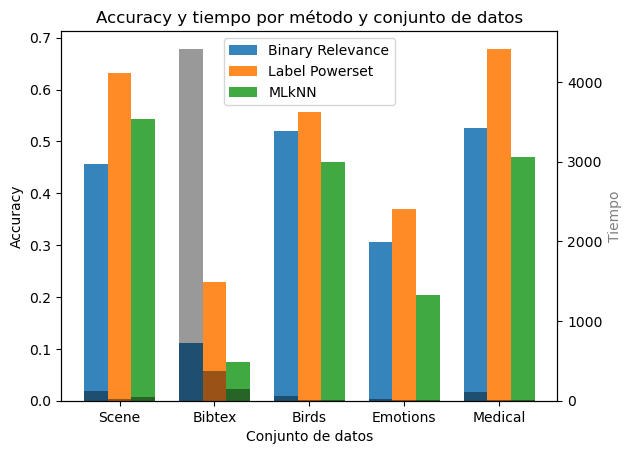

In [18]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Binary Relevance', 'Label Powerset', 'MLkNN']
datasets = ['Scene', 'Bibtex', 'Birds', 'Emotions', 'Medical']

# Valores de la métrica
accuracy_values = {
    'Binary Relevance': [0.4574, 0.1106, 0.5209, 0.3052, 0.5256],
    'Label Powerset': [0.6319, 0.2287, 0.5566, 0.3693, 0.6789],
    'MLkNN': [0.5430, 0.0749, 0.4605, 0.2040, 0.4703]
}

time_values_by_method = {
    'Binary Relevance': [122.96, 4417.84, 59.37, 16.70, 108.73],
    'Label Powerset': [26.66, 375.25, 10.44, 3.20, 5.46],
    'MLkNN': [44.30, 144.12, 6.05, 2.80, 12.96]
}

time_values_by_dataset = {
    'Scene': [122.96, 26.66, 44.30],
    'Bibtex': [4417.84, 375.25, 144.12],
    'Birds': [59.37, 10.44, 6.05],
    'Emotions': [16.70, 3.20, 2.80],
    'Medical': [108.73, 5.46, 12.96]
}

# Crear gráfico de barras incluyendo el tiempo
fig, ax1 = plt.subplots()
index = np.arange(len(datasets))
bar_width = 0.25
opacity_metrics = 0.9
opacity_times = 0.4

for i, method in enumerate(methods):
    ax1.bar(index + bar_width * i, accuracy_values[method], bar_width,
    alpha=opacity_metrics,
    label=method)

# Eje de la métrica
ax1.set_xlabel('Conjunto de datos')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_title('Accuracy y tiempo por método y conjunto de datos')
ax1.set_xticks(index + bar_width, datasets)
ax1.legend()

# Eje del tiempo
ax2 = ax1.twinx()
for i, method in enumerate(methods):
    ax2.bar(index + bar_width * i, time_values_by_method[method], bar_width,
    alpha=opacity_times,
    color='black',
    label=method)

ax2.set_ylabel('Tiempo (s)', color='grey')

plt.show()

# Conclusiones finales

En esta práctica se ha podido estudiar tanto a nivel teórico como práctico el uso de algoritmos en conjuntos de datos multietiquetas. Se ha realizado de manera gradual, comenzando por los tutoriales que la propia librería proporciona hasta elaborar el código de manera más personalizada y adaptada para los conjuntos de datos elegidos y cargados, incluyendo la implementación manual de las métricas para entender mejor su naturaleza y significado. Finalmente se ha realizado un análisis de los resultados obtenidos, con una comparación de las métricas obtenidas. Ha sido un análisis guiado, lo que ha facilitado la redacción al tener indicado los principales puntos clave de los que hablar. Además no sólo se ha tenido en cuenta las métricas obtenidas por las funciones que proporciona la librería utilizada sino también el tiempo que lleva cada algoritmo.

Al realizar el análisis es interesante cómo la elaboración de la gráfica permite ver de manera mucho más visual e intuitiva los resultados, facilitando así la extracción de conclusiones. Al comenzar el análisis se han hecho mirando los resultados manualmente en el Jupyter Notebook de la implementación. Sin embargo, al empezar a redacción se ha convertido en una práctica muy incómoda y se ha pasado a elaborar primero unas tablas con los datos obtenidos. Posteriormente se ha implementado la gráfica tal y como pedía el enunciado y entonces el análisis ha sido más sencillo. De un vistazo se pueden ver los mejores y peores resultados en la métrica mostrada para cada conjunto de datos según el algoritmo utilizado. Además de poder tener en cuenta el tiempo de ejecución.